In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logistic__penalty': ['l1', 'l2'],  # Penalty type
    'logistic__solver': ['liblinear', 'saga']  # Solvers for l1 and l2
}

# Define the logistic regression pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))  # Logistic regression
])

# Perform grid search
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve for the tuned model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Tuned Logistic Regression")
plt.legend()
plt.show()


NameError: name 'X_train' is not defined

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.title("ROC Curve for Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Random Forest model with hyperparameters
tuned_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Train the model
tuned_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = tuned_rf.predict(X_test)
y_pred_proba_rf = tuned_rf.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_rf = tuned_rf.score(X_test, y_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("Classification Report:")
print(report_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC-AUC Score: 0.8729287497237384

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      7952
        True       0.60      0.38      0.46      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.67      0.70      9043
weighted avg       0.88      0.89      0.88      9043



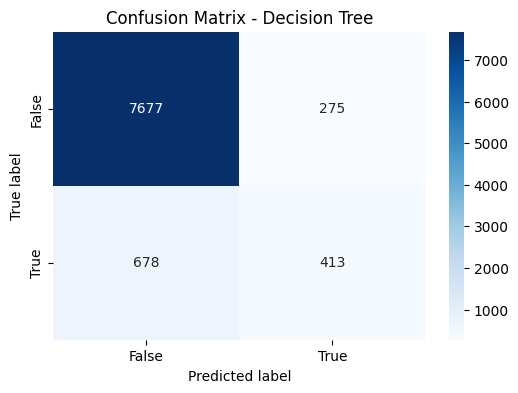

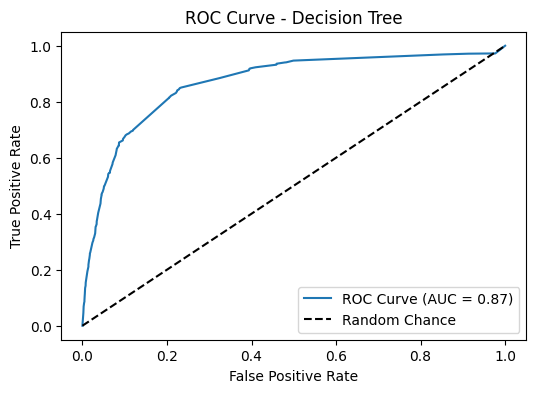

ROC-AUC Score: 0.8674558233913102


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10]  # Minimum samples in a leaf node
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best parameters and best ROC-AUC score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best ROC-AUC Score:", grid_search_dt.best_score_)

# Get the best model
best_dt = grid_search_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f"ROC Curve (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc_dt}")


/var/folders/c8/hfkpwzg52nvg87wzjcq5tpqm0000gn/T/ipykernel_84353/1834479473.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:15], palette="viridis")


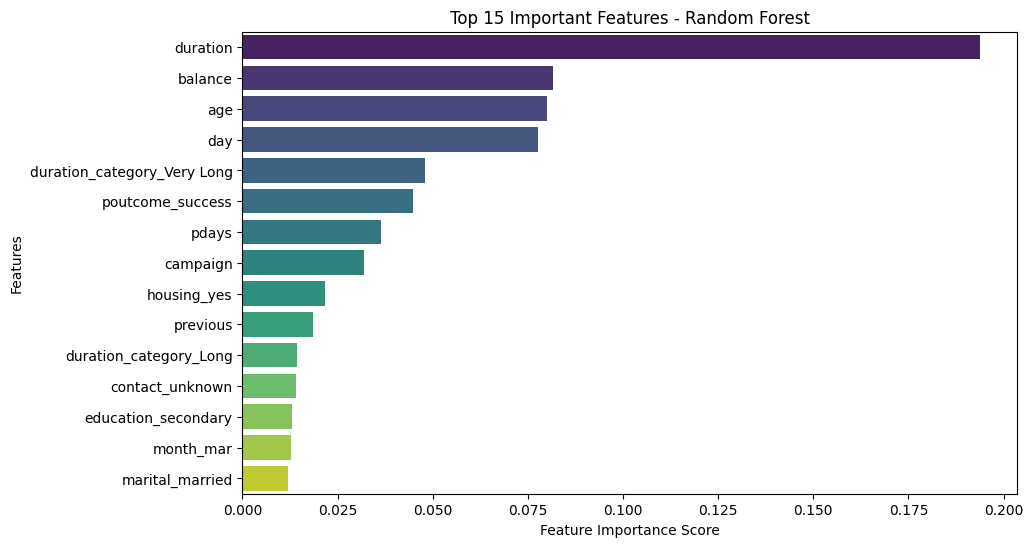

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:15], palette="viridis")
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


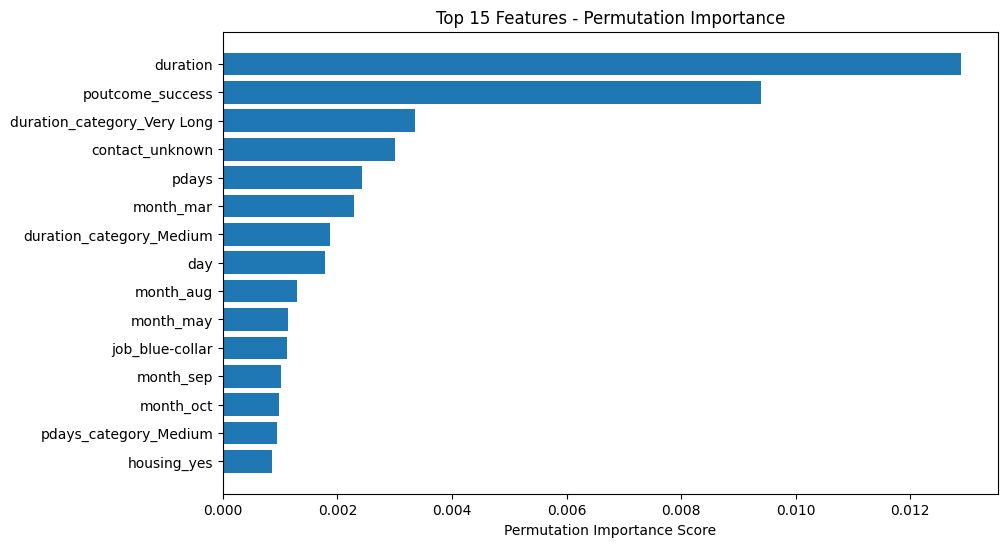

In [101]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Compute permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort importance values
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx[:15])), perm_importance.importances_mean[sorted_idx[:15]], align='center')
plt.yticks(range(len(sorted_idx[:15])), X_test.columns[sorted_idx[:15]])
plt.xlabel("Permutation Importance Score")
plt.title("Top 15 Features - Permutation Importance")
plt.gca().invert_yaxis()
plt.show()
